### 휴먼지능정보공학과 201910787 김영서

## k-Means 클러스터링
```sklearn.datasets.make_blobs```를 사용하여 아래 코드로 데이터를 생성하세요.



```

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

```



이 데이터를 4개의 클러스터로 군집화하세요.

Python으로 구현해서 클러스터링하는데, 강의에서 만든 함수 코드를 한 군데 수정해야 한다.

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

### 데이터 로드

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [20]:
print(X,y)
print(X[0],y[0])

[[ 6.69786996e-01  3.59540802e+00]
 [-2.02396992e+00  7.99569054e+00]
 [ 1.43289271e+00  4.37679234e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 1.71444449e+00  5.02521524e+00]
 [ 7.43873988e-01  4.12240568e+00]
 [-2.04363942e+00  4.06392123e+00]
 [-6.78603291e-01  7.88799076e+00]
 [-4.74920358e-02  5.47425256e+00]
 [-1.46976488e+00  7.69183251e+00]
 [-8.64176859e-01  6.86528639e+00]
 [-1.84838498e+00  6.90859736e+00]
 [-1.27182547e+00  7.13460392e+00]
 [-9.34289778e-01  7.73253222e+00]
 [-7.34157408e-01  7.44484466e+00]
 [ 3.18515794e+00  8.90082233e-02]
 [ 1.35139348e+00  2.06383637e+00]
 [-9.70171483e-02  3.48456995e+00]
 [-1.93150361e+00  2.93698060e+00]
 [ 2.73890793e+00  1.56768168e-01]
 [ 2.33812285e+00  3.43116792e+00]
 [-1.93673697e+00  7.57276799e+00]
 [-1.98885366e+00  3.24143178e+00]
 [ 2.33466499e+00 -2.40825518e-02]
 [ 4.38990142e-01  4.53592883e+00]
 [-1.58597553e+00  2.51979529e+00]
 [-3.73138797e-01  3.80619114e+00]
 [ 7.67522789e-01  4.39759671e+00]
 [ 2.94821884e+00  2

### 함수 선언

In [21]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193 #식으로 구하기
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [22]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [23]:
def cluster(x, k, centroids): #x,k, 초기중심점
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, col), dtype=float) #수정부분
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            #print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        #print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids!!\n")# {} => \n{}".format(centroids, _centroids))
            print("\n-----Final Centroids is...\n{}\n".format(_centroids))
            print("\n We found Centroids at {} times.\n".format(iter))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            #print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            if iter==1:
                print("\n Init Centroids is...\n{}".format(centroids))
            print ("\n.....Updating Centroids To..\n{}".format(_centroids))
            centroids = _centroids
            iter += 1

### (1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

In [24]:
import random
randlist=random.sample(range(100), 4)
print(randlist)

[43, 48, 77, 74]




====== Iteration 1 ======

 Init Centroids is...
[[-2.07459735  3.58809203]
 [ 0.67047877  4.04094275]
 [-1.68770604  3.3993561 ]
 [ 1.00372519  4.19147702]]

.....Updating Centroids To..
[[-1.83317644  6.48886124]
 [ 0.68590242  3.15814481]
 [-1.4838423   2.98067558]
 [ 1.28805173  4.2828083 ]]


====== Iteration 2 ======

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [ 1.5647395   1.54909095]
 [-1.63043905  3.09879034]
 [ 1.02017754  4.47072208]]


====== Iteration 3 ======

.....Updating Centroids To..
[[-1.27208964  7.74944718]
 [ 1.97918933  0.97920012]
 [-1.52704861  3.14337865]
 [ 0.87673717  4.2964758 ]]


====== Iteration 4 ======

.....NOT Updating Centroids!!


-----Final Centroids is...
[[-1.27208964  7.74944718]
 [ 1.97918933  0.97920012]
 [-1.52704861  3.14337865]
 [ 0.87673717  4.2964758 ]]


 We found Centroids at 4 times.



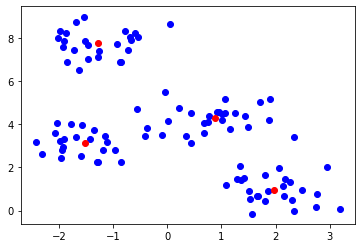

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


k = 4

#centroids=np.array(X[randlist[0]],X[randlist[1]],X[randlist[2]],X[randlist[3]],dtype=float)
centroids = np.array([[X[randlist[0],0],X[randlist[0],1]],[X[randlist[1],0],X[randlist[1],1]],[X[randlist[2],0],X[randlist[2],1]],[X[randlist[3],0],X[randlist[3],1]]], dtype=float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

### (2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [26]:
print(y)

[0 3 0 0 0 0 2 3 0 3 3 3 3 3 3 1 1 2 2 1 0 3 2 1 0 2 2 0 1 1 1 3 1 1 2 0 3
 1 3 2 0 2 3 2 2 3 1 2 0 0 0 1 2 2 2 3 3 1 1 3 3 1 1 0 1 3 2 2 1 0 3 1 0 3
 0 0 2 2 1 1 1 3 2 0 1 2 1 1 0 0 0 2 0 2 2 3 3 2 3 0]


In [27]:
print(clusterAssigned[:,0])

[3. 0. 3. 3. 3. 3. 2. 0. 3. 0. 0. 0. 0. 0. 0. 1. 1. 3. 2. 1. 3. 0. 2. 1.
 3. 2. 2. 3. 1. 1. 1. 0. 1. 1. 2. 3. 0. 1. 0. 2. 3. 2. 0. 2. 2. 0. 1. 2.
 3. 3. 3. 1. 2. 2. 2. 0. 0. 1. 1. 0. 0. 1. 1. 3. 1. 0. 2. 2. 1. 3. 0. 1.
 3. 0. 3. 3. 2. 2. 1. 1. 1. 0. 2. 3. 1. 2. 1. 1. 3. 3. 3. 2. 3. 2. 2. 0.
 0. 2. 0. 3.]


#### cluster와 내가 추정한 cluster의 집단 번호가 다르므로, 변환해주어 compareCluster 넣어준다.

In [28]:
compareCluster=np.array([])

for i in range(len(clusterAssigned[:,0])):
    if clusterAssigned[:,0][i]==0:
        compareCluster=np.append(compareCluster,3)
        
    elif clusterAssigned[:,0][i]==1:
        compareCluster=np.append(compareCluster,2)
        
    elif clusterAssigned[:,0][i]==2: 
        compareCluster=np.append(compareCluster,1)
        
    else: #clusterAssigned[:,0][i]==3
        compareCluster=np.append(compareCluster,0)

In [29]:
compareCluster

array([0., 3., 0., 0., 0., 0., 1., 3., 0., 3., 3., 3., 3., 3., 3., 2., 2.,
       0., 1., 2., 0., 3., 1., 2., 0., 1., 1., 0., 2., 2., 2., 3., 2., 2.,
       1., 0., 3., 2., 3., 1., 0., 1., 3., 1., 1., 3., 2., 1., 0., 0., 0.,
       2., 1., 1., 1., 3., 3., 2., 2., 3., 3., 2., 2., 0., 2., 3., 1., 1.,
       2., 0., 3., 2., 0., 3., 0., 0., 1., 1., 2., 2., 2., 3., 1., 0., 2.,
       1., 2., 2., 0., 0., 0., 1., 0., 1., 1., 3., 3., 1., 3., 0.])

#### 거리 비교

In [30]:
X[17]

array([-0.09701715,  3.48456995])

In [31]:
import math
 
class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
blob = Point2D(x=X[17][0], y=X[17][1])    # 제대로 나오지 않은 값
p1 = Point2D(x=centroids[1][0], y=centroids[1][1])    # make_blobs에서 생성한 군집의 cluster id와 비교. 2->1
p2 = Point2D(x=centroids[3][0], y=centroids[3][1])    # k-means를 통해 생성한 군집의 cluster id. 0->3

# 거리 1: cluster 2(id 3으로 수정됨)의 중심과 X의 17번째 항목
a1 = p1.x - blob.x 
b1 = p1.y - blob.y 
c1 = math.sqrt((a1 * a1) + (b1 * b1)) 

# 거리 2: cluster 0(id 1로 수정됨)의 중심과 X의 17번째 항목
a2 = p2.x - blob.x 
b2 = p2.y - blob.y 
c2 = math.sqrt((a2 * a2) + (b2 * b2)) 

print(c1) # y
print(c2) # k-means 결과 배정된 cluster

3.2538456249398604
1.267828293548772


거리를 비교해보니 cluster0과 거리가 더 가까워서 0번이 할당되었음을 알 수 있다.